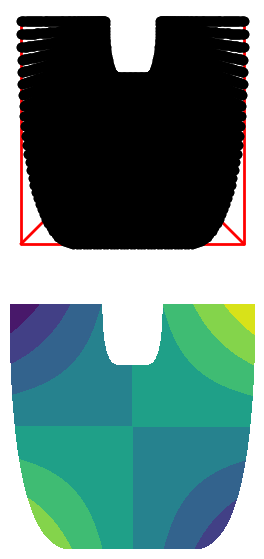

In [2]:
from numpy import linspace, meshgrid, zeros, sqrt, empty
import matplotlib.pyplot as plt


def find_span( knots, degree, x ):
    knots = knots
    p     = degree
    
    low   = p
    high = len(knots)-1-p
    if   x <= knots[low ]: mid = low
    elif x >= knots[high]: mid =  high-1
    else:
        mid = (low+high)//2
        while x < knots[mid] or x >= knots[mid+1]:
            if x < knots[mid]:
               high = mid
            else:
               low  = mid
            mid = (low+high)//2

    return mid
    
def basis_funs( knots, degree, x, span ):

    left   = empty( degree  , dtype=float )
    right  = empty( degree  , dtype=float )
    values = empty( degree+1, dtype=float )

    values[0] = 1.0
    for j in range(0,degree):
        left [j] = x - knots[span-j]
        right[j] = knots[span+1+j] - x
        saved    = 0.0
        for r in range(0,j+1):
            temp      = values[r] / (right[r] + left[j-r])
            values[r] = saved + right[r] * temp
            saved     = left[j-r] * temp
        values[j+1] = saved

    return values


def B_spline_Surface(knots, degree, Uh, ncells):
    knots1, knots2 = knots
    p1, p2         = degree
    nx, ny         = ncells
    n, m, d        = Uh.shape
    P              = zeros((n, m, d, 1))
    Q              = zeros((nx, ny, d, 1))
    P[:,:,:,0]       = Uh.copy()
    xs, ys         = linspace(knots1[p1], knots1[-p1-1], nx),linspace(knots2[p2], knots1[-p2-1], ny)
    for i,ix in enumerate(xs):
        i_span_ix = find_span(knots1, p1, ix)
        val_on_ix = basis_funs(knots1, p1, ix, i_span_ix)
        for j, jy in enumerate(ys):
            j_span_jy = find_span(knots2, p2, ix)
            val_on_jy = basis_funs(knots2, p2, jy, j_span_jy)
            punch_fig = zeros(d)
            for i_l1 in range(p1+1):
                index_x = i_span_ix - p1 + i_l1
                for j_l2 in range(p2+1):
                    index_y = j_span_jy - p2 + j_l2
                    punch_fig[:] += val_on_ix[i_l1] * val_on_jy[j_l2] * P[index_x, index_y,:,0]
            Q[i,j,:,0] = punch_fig
    return Q[:,:,:,0]

T1      = [0. , 0., 0., 1/3, 2/3, 1., 1., 1.]
T2      = [0. , 0., 0., 1., 1., 1.]
p1, p2  = 2,2
P       = zeros((5,3,3))
##########################################
P[0,0,:]= [-4,4,0]
P[1,0,:]= [-4,-4,0]
P[2,0,:]= [0,-4,0]
P[3,0,:]= [4,-4,0]
P[4,0,:]= [4,4,0]

# P[5,0,:]= [4,0,0]
# P[6,0,:]= [4,4,0]



P[0,1,:]= [-2,4,0]
P[1,1,:]= [ -2,-2,0]
P[2,1,:]= [0,-2,0]
P[3,1,:]= [2,-2,0]
P[4,1,:]= [2,4,0]

# P[5,1,:]= [3,3,0]
# P[6,1,:]= [3,4,0]


P[0,2,:]= [-1,4,0]
P[1,2,:]= [-1,2,0]
P[2,2,:]= [0,2,0]
P[3,2,:]= [1,2,0]
P[4,2,:]= [1,4,0]
Surface = B_spline_Surface((T1, T2), (p1, p2), P, (100, 100))
                    
         
#################\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

fig, axes = plt.subplots(2,  figsize=[7,7] )
for ax in axes:
   ax.set_aspect('equal')

for i in range(P.shape[1]):
    axes[0].plot(P[:,i,0],P[:,i,1], 'r-', linewidth = 2.)
for i in range(P.shape[0]):
    axes[0].plot(P[i,:,0],P[i,:,1], 'r-', linewidth = 2.)

axes[0].plot(Surface[:,:,0],Surface[:,:,1],'ko')
axes[0].plot(Surface[:,:,0].T,Surface[:,:,1].T,'ko')

# axes[1].plot(Surface[:,:,0], Surface[:,:,1],'ko')
axes[1].axis('off')
axes[0].axis('off')

axes[1].margins(0,0)
axes[1].contourf(Surface[:,:,0],Surface[:,:,1], Surface[:,:,0]*Surface[:,:,1])
plt.savefig('Ushape.png')


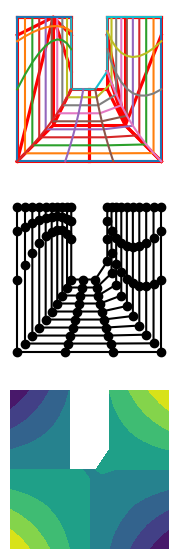

In [14]:

T1      = [0. , 0., 0., 1/3, 1/3, 1/3, 2/3, 2/3, 2/3, 1., 1., 1.]
T2      = [0. , 0., 0., 1., 1., 1.]
p1, p2  = 2, 2

P       = zeros((9,3,3))

P[0,0,:] = [-4, 4, 0]
P[1,0,:] = [-4, 3, 0]
P[2,0,:] = [-4, -4, 0]
P[3,0,:] = [-4, -4, 0]
P[4,0,:] = [0, -4, 0]
P[5,0,:] = [4, -4, 0]
P[6,0,:] = [4, -4, 0]
P[7,0,:] = [4, 3, 0]
P[8,0,:] = [4, 4, 0]


# P[5,0,:]= [4,4,0]
# P[6,0,:]= [4,4,0]

# P[5,0,:]= [4,0,0]
# P[6,0,:]= [4,4,0]



P[0,1,:]= [-2, 4,0]
P[1,1,:]= [-2, 4,0]
P[2,1,:]= [-2, 4,0]
# P[1,1,:]= [-2, 3, 0]
# P[2,1,:]= [-2,1, 0]
P[3,1,:]= [-2,-2,0]
P[4,1,:]= [0,-2, 0]

P[5,1,:]= [2, -2,0]
P[6,1,:]= [2, -2,0]
P[7,1,:]= [2, -2,0]
# P[6,1,:]= [2, 1, 0]
# P[7,1,:]= [2, 3,0]
P[8,1,:]= [2, 4,0]


# P[5,1,:]= [2,4,0]
# P[6,1,:]= [2,4,0]

# P[5,1,:]= [3,3,0]
# P[6,1,:]= [3,4,0]


P[0,2,:]= [-1,4,0]
P[1,2,:]= [-1,3,0]
P[2,2,:]= [-1,1,0]
P[3,2,:]= [-1,0,0]
P[4,2,:]= [0,0,0]
P[5,2,:]= [1,0,0]
P[6,2,:]= [1,1,0]
P[7,2,:]= [1,3,0]
P[8,2,:]= [1,4,0]


# P[5,2,:]= [1,4,0]
# P[6,2,:]= [1,4,0]
# P[5,2,:]= [2,4,0]
# P[6,2,:]= [2,4,0]


Surface = B_spline_Surface((T1, T2), (p1, p2), P, (10, 10))
                    
#################\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

fig, axes = plt.subplots(3,  figsize=[7,7] )
for ax in axes:
   ax.set_aspect('equal')

for i in range(P.shape[1]):
    axes[0].plot(P[:,i,0],P[:,i,1], '-r', linewidth = 2.2)
for i in range(P.shape[0]):

    axes[0].plot(P[i,:,0],P[i,:,1], '-r', linewidth = 2.3)

axes[0].plot(Surface[:,:,0],Surface[:,:,1])
axes[0].plot(Surface[:,:,0].T,Surface[:,:,1].T)

axes[1].plot(Surface[:,:,0], Surface[:,:,1], 'ko-')
axes[2].contourf(Surface[:,:,0], Surface[:,:,1],Surface[:,:,0]*Surface[:,:,1])
axes[1].axis('off')
axes[0].axis('off')
axes[2].axis('off')
plt.savefig('Ushape.png')